In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
demographic_data = "resources/Demographics.csv"
birth_data = "resources/Birth_Statistics.csv"
cancer_data = "resources/Cancer_Rates.csv"
hospital_data = "resources/Hospitalization_Discharge_Rates.csv"
health_data = "resources/LakeCounty_Health.csv"
mortality_data = "resources/Mortality_Rates.csv"
obesity_data = "resources/Obesity_Percentages.csv"


# Read the data files
county_demographic_data = pd.read_csv(demographic_data)
county_birth_data = pd.read_csv(birth_data)
county_cancer_data = pd.read_csv(cancer_data)
county_hospital_data = pd.read_csv(hospital_data)
county_health_data = pd.read_csv(health_data)
county_mortality_data = pd.read_csv(mortality_data)
county_obesity_data = pd.read_csv(obesity_data)

county_demographic_data.head()

,OBJECTID,ZIP,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,...,Female_,High_Schoo,Associate_,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,SHAPE_Length,SHAPE_Area
0,1,60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,...,46.858671,94.3,8.2,29.3,7.528748,75928,5.7,10.5,215525.155184,-1.149062e+09
1,2,60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,...,51.193264,97.2,5.4,64.3,2.462192,122789,2.8,4.9,178637.109618,-8.027354e+08
2,3,60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,...,51.006466,97.6,3.5,71.5,1.739495,130140,2.5,3.5,111400.890558,-3.674576e+08
3,4,60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,...,51.912942,88.9,7.9,22.7,14.162791,55431,11.2,11.2,92363.084625,-1.666177e+08
4,5,60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,...,50.214698,93.8,6.2,45.5,7.104066,81055,6.2,5.5,247258.224672,-8.455179e+08


In [2]:
county_mortality_data.head()

,OBJECTID,ZIP,PCT_EARLY,Avg_Age,Cancer_D,Heart_D,COPD_D,SHAPE_Length,SHAPE_Area
0,1,60002,0.520875,71.055412,183.546648,150.623482,32.923166,215525.155184,-1.149062e+09
1,2,60010,0.259170,78.499343,96.156027,87.538270,19.956911,178637.109618,-8.027354e+08
2,3,60015,0.310690,78.025232,150.000000,135.820896,16.417910,111400.890558,-3.674576e+08
3,4,60020,0.458126,72.811321,217.811705,209.669211,56.997455,92363.084625,-1.666177e+08
4,5,60030,0.402194,73.710013,120.368316,100.399379,24.406479,247258.224672,-8.455179e+08


Combine Demographics & Mortality DataFrames

In [3]:
demo_mortality_df = pd.merge(county_mortality_data, county_demographic_data, how = "outer", on = "OBJECTID")

demo_mortality_df.head()

,OBJECTID,ZIP_x,PCT_EARLY,Avg_Age,Cancer_D,Heart_D,COPD_D,SHAPE_Length_x,SHAPE_Area_x,ZIP_y,...,Female_,High_Schoo,Associate_,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,SHAPE_Length_y,SHAPE_Area_y
0,1,60002,0.520875,71.055412,183.546648,150.623482,32.923166,215525.155184,-1.149062e+09,60002,...,46.858671,94.3,8.2,29.3,7.528748,75928,5.7,10.5,215525.155184,-1.149062e+09
1,2,60010,0.259170,78.499343,96.156027,87.538270,19.956911,178637.109618,-8.027354e+08,60010,...,51.193264,97.2,5.4,64.3,2.462192,122789,2.8,4.9,178637.109618,-8.027354e+08
2,3,60015,0.310690,78.025232,150.000000,135.820896,16.417910,111400.890558,-3.674576e+08,60015,...,51.006466,97.6,3.5,71.5,1.739495,130140,2.5,3.5,111400.890558,-3.674576e+08
3,4,60020,0.458126,72.811321,217.811705,209.669211,56.997455,92363.084625,-1.666177e+08,60020,...,51.912942,88.9,7.9,22.7,14.162791,55431,11.2,11.2,92363.084625,-1.666177e+08
4,5,60030,0.402194,73.710013,120.368316,100.399379,24.406479,247258.224672,-8.455179e+08,60030,...,50.214698,93.8,6.2,45.5,7.104066,81055,6.2,5.5,247258.224672,-8.455179e+08


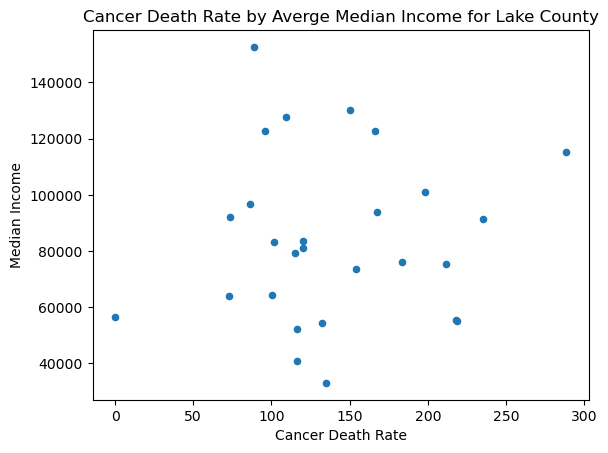

In [4]:
cancer = demo_mortality_df[["Med_Income","Cancer_D"]]
cancer.plot.scatter(x = "Cancer_D", y = "Med_Income")

plt.title("Cancer Death Rate by Averge Median Income for Lake County")
plt.xlabel("Cancer Death Rate")
plt.ylabel("Median Income")

plt.savefig('cancer.png')

plt.show()


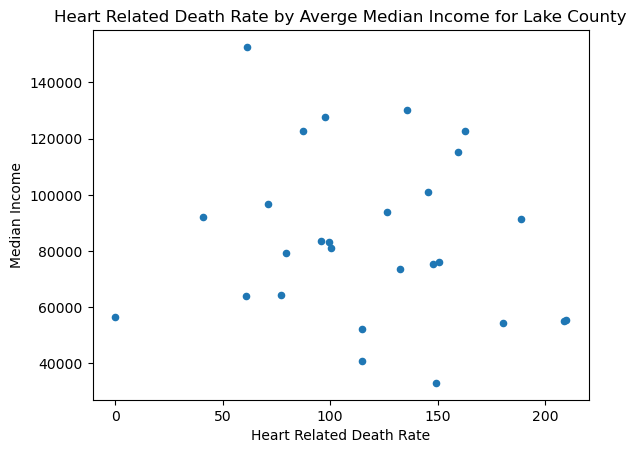

In [5]:
heart = demo_mortality_df[["Med_Income","Heart_D"]]
heart.plot.scatter(x = "Heart_D", y = "Med_Income")

plt.title("Heart Related Death Rate by Averge Median Income for Lake County")
plt.xlabel("Heart Related Death Rate")
plt.ylabel("Median Income")

plt.savefig('heart.png')

plt.show()


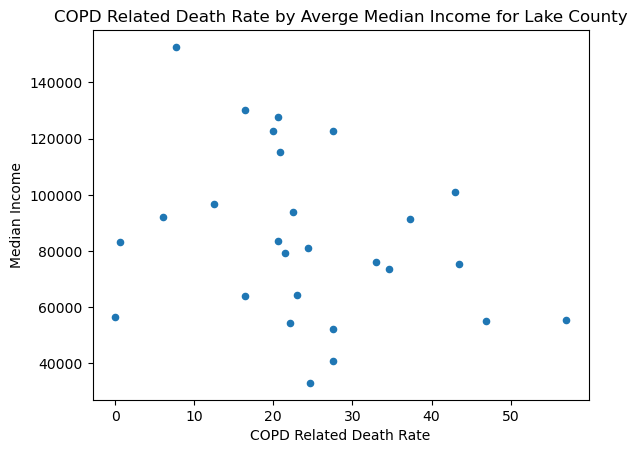

In [6]:
copd = demo_mortality_df[["Med_Income","COPD_D"]]
copd.plot.scatter(x = "COPD_D", y = "Med_Income")

plt.title("COPD Related Death Rate by Averge Median Income for Lake County")
plt.xlabel("COPD Related Death Rate")
plt.ylabel("Median Income")

plt.savefig('copd.png')

plt.show()


Combine Demographics & Obesity DataFrames

In [7]:
demo_obesity_df = pd.merge(county_obesity_data, county_demographic_data, how = "outer", on = "OBJECTID")

demo_obesity_df.head()

,OBJECTID,STATE,ZIP_x,Zipcode,Pct_Obese,ObsOrOvrwt,SHAPE_Length_x,SHAPE_Area_x,ZIP_y,Total_Pop,...,Female_,High_Schoo,Associate_,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,SHAPE_Length_y,SHAPE_Area_y
0,1,IL,60002,60002,0.266,0.615,215525.155184,-1.149062e+09,60002,24305,...,46.858671,94.3,8.2,29.3,7.528748,75928,5.7,10.5,215525.155184,-1.149062e+09
1,2,IL,60010,60010,0.145,0.482,178637.109618,-8.027354e+08,60010,44416,...,51.193264,97.2,5.4,64.3,2.462192,122789,2.8,4.9,178637.109618,-8.027354e+08
2,3,IL,60015,60015,0.135,0.463,111400.890558,-3.674576e+08,60015,27373,...,51.006466,97.6,3.5,71.5,1.739495,130140,2.5,3.5,111400.890558,-3.674576e+08
3,4,IL,60020,60020,0.267,0.608,92363.084625,-1.666177e+08,60020,10246,...,51.912942,88.9,7.9,22.7,14.162791,55431,11.2,11.2,92363.084625,-1.666177e+08
4,5,IL,60030,60030,0.230,0.573,247258.224672,-8.455179e+08,60030,36563,...,50.214698,93.8,6.2,45.5,7.104066,81055,6.2,5.5,247258.224672,-8.455179e+08


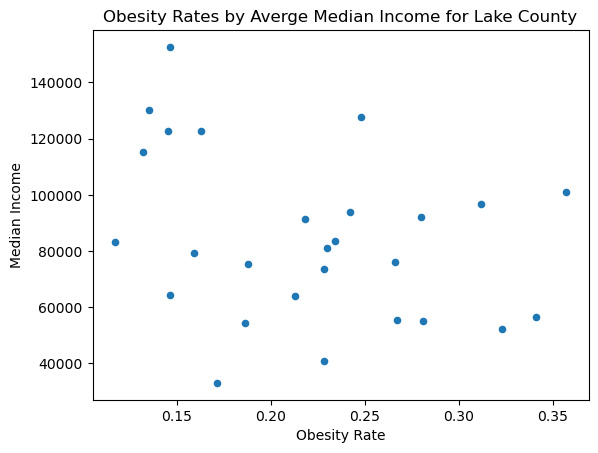

In [8]:
copd = demo_obesity_df[["Med_Income","Pct_Obese"]]
copd.plot.scatter(x = "Pct_Obese", y = "Med_Income")

plt.title("Obesity Rates by Averge Median Income for Lake County")
plt.xlabel("Obesity Rate")
plt.ylabel("Median Income")

plt.savefig('obesity.png')

plt.show()


My hypothesis was that there would be a corelation between higher income households and lower death rates, not necessarily with cancer, but with heart and copd related deaths. 
Unfortunatly, there was no correlation. 

With obesity rates compared to household income, I thought that there would be less obesity in higher income homes. As the chart shows, there again was no correlation. 

Information provided by Lake County, Illinois
https://www.lakecountyil.gov/